---

### SUMMARY

1. [Import and Read the Data](#1)
2. [Exploratory Data Analysis](#2)
3. [Data Preprocessing](#3)
4. [Model Selection](#4)
5. [Ensemble Learning](#5)

---

# 1. Import and Read the Data
<a id="1"></a>

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.model_selection import cross_val_predict, validation_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

from xgboost import XGBClassifier


from scipy.stats import kurtosis, skew

from time import time

from warnings import simplefilter
simplefilter("ignore")

pd.set_option('display.max_columns', None)

In [5]:
data = pd.read_csv('loan_data.csv')

data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
print(f'The dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The dataset has 45000 rows and 14 columns.


In [7]:
print(f'The dataset has {data.isna().sum().sum()} null values.')

The dataset has 0 null values.


In [8]:
print(f'The dataset has {data.duplicated().sum()} duplicate values.')

The dataset has 0 duplicate values.


In [9]:
data.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

The columns data type are correct. This is their meaning:

* **person_age.** Age of the person.
* **person_gender.** Gender of the person.
* **person_education.** Highest education level.
* **person_income.** Annual income.
* **person_emp_exp.** Years of employment experience.
* **person_home_ownership.** Home ownership status (e.g., rent, own, mortgage).
* **loan_amnt.** Loan amount requested.
* **loan_intent.** Purpose of the loan.
* **loan_int_rate.** Loan interest rate.
* **loan_percent_income.** Loan amount as a percentage of annual income.
* **cb_person_cred_hist_length.** Length of credit history in years.
* **credit_score.**	Credit score of the person.
* **previous_loan_defaults_on_file.** Indicator of previous loan defaults.
* **loan_status (target variable).** Loan approval status: 1 = approved; 0 = rejected.

In [11]:
data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


There could be inconsistencies in the data, like the maximum age of a person (144 years).

# 2. Exploratory Data Analysis
<a id="2"></a>

## 2.1 Overview

<Figure size 1200x600 with 0 Axes>

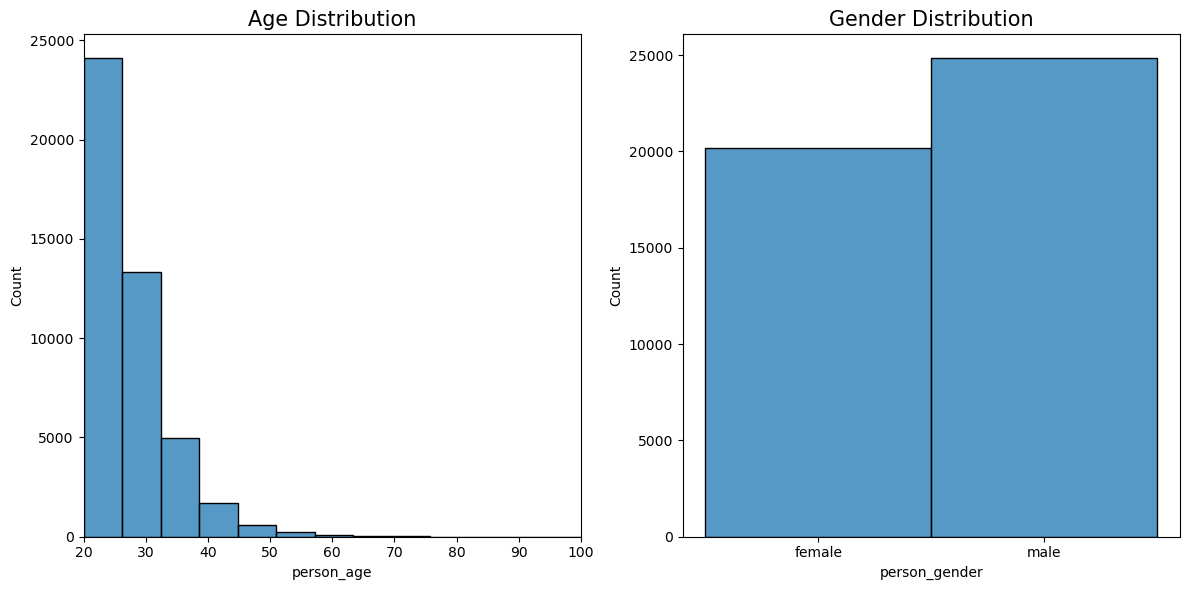

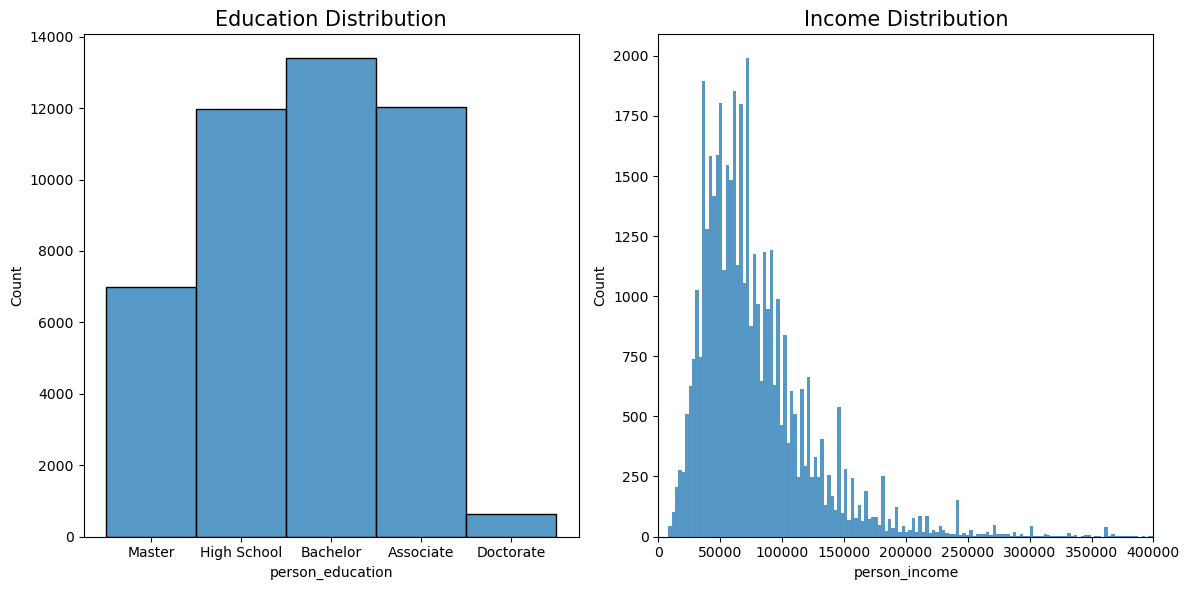

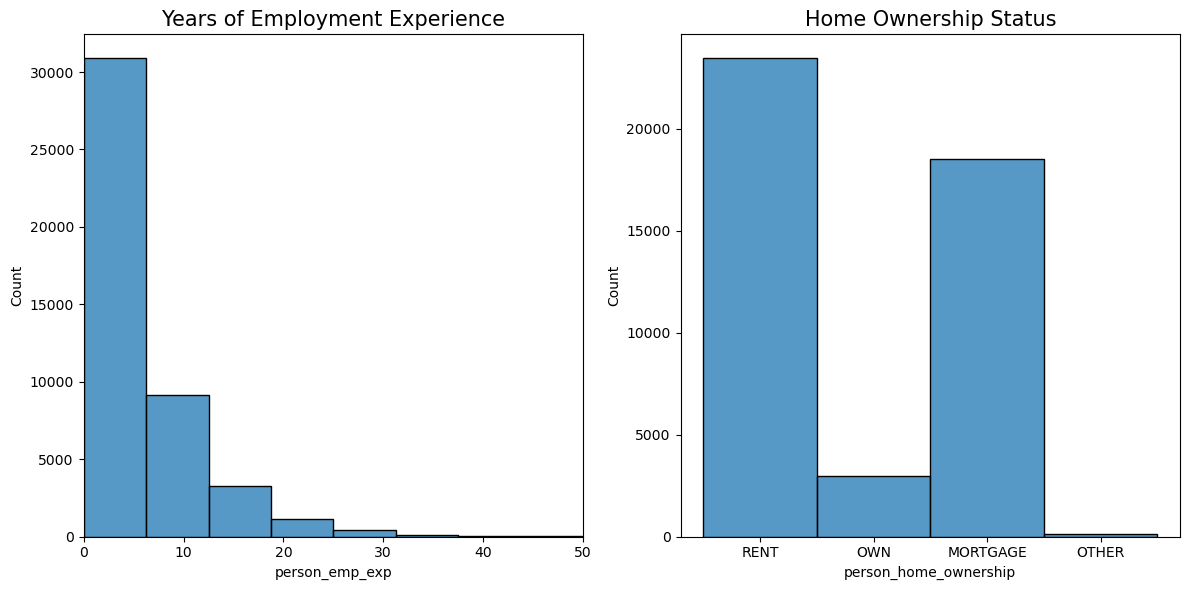

In [15]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, middle, bottom) = bigfig.subfigures(3,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_age', bins=20, ax=ax1)
ax1.set_xlim(20, 100)
ax1.set_title('Age Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_gender', ax=ax2)
ax2.set_title('Gender Distribution', size=15)

plt.tight_layout()

### Middle figure ###
middle.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_education', ax=ax1)
ax1.set_title('Education Distribution', size=15)

ax2 = sns.histplot(data=data, x='person_income', ax=ax2)
ax2.set_title('Income Distribution', size=15)
ax2.set_xlim(0, 400000)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='person_emp_exp', bins=20, ax=ax1)
ax1.set_title('Years of Employment Experience', size=15)
ax1.set_xlim(0, 50)

ax2 = sns.histplot(data=data, x='person_home_ownership', ax=ax2)
ax2.set_title('Home Ownership Status', size=15)

plt.tight_layout()

One can notice that:
* The person age and experience distributions are right skewed and have many outliers. Some of them are unrealistic, like persons of 140 years of age.
* There is a slight excess of male clients, even though the gender distribution is quite balanced.
* The majority of clients either pay rent or a mortgage.
* The income distribution is bell-shaped, but right skewed.

In [17]:
num_features_one = ['person_age', 'person_income', 'person_emp_exp']

for col in num_features_one:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

Skewness of person_age: 2.5480690657849285
Kurtosis of person_age: 18.64724355494631

Skewness of person_income: 34.13644520299569
Kurtosis of person_income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243



These numbers show that the three distributions that I examined are highly skewed. They are leptokurtic distributions (kurtosis > 3, excess kurtosis > 0), which means that they have a sharp peak and heavy tails.

<Figure size 1200x600 with 0 Axes>

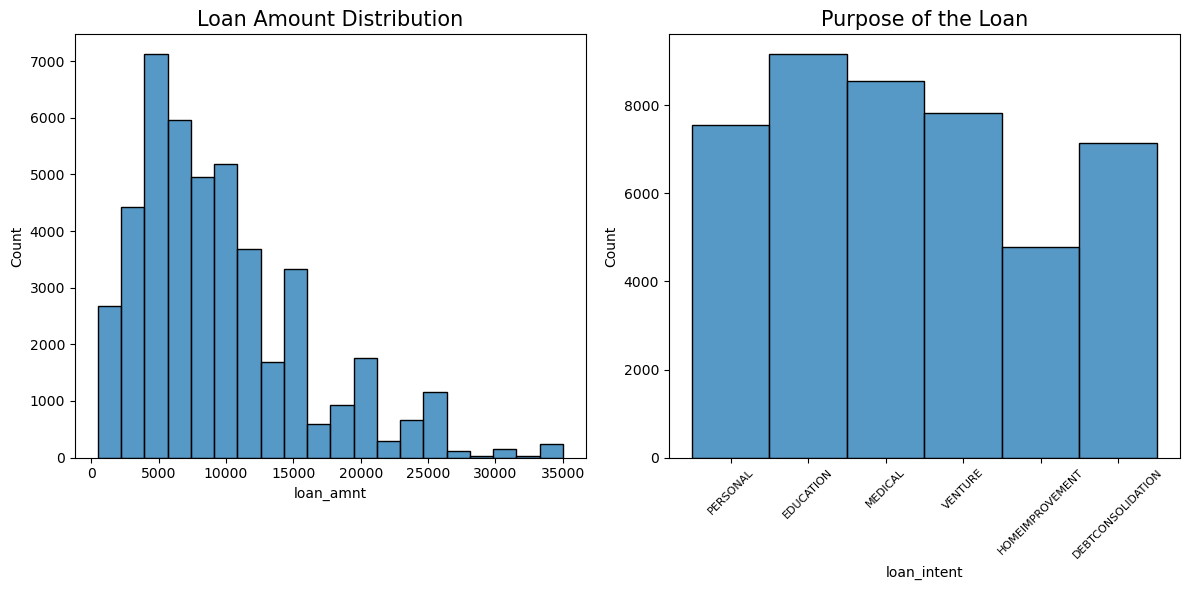

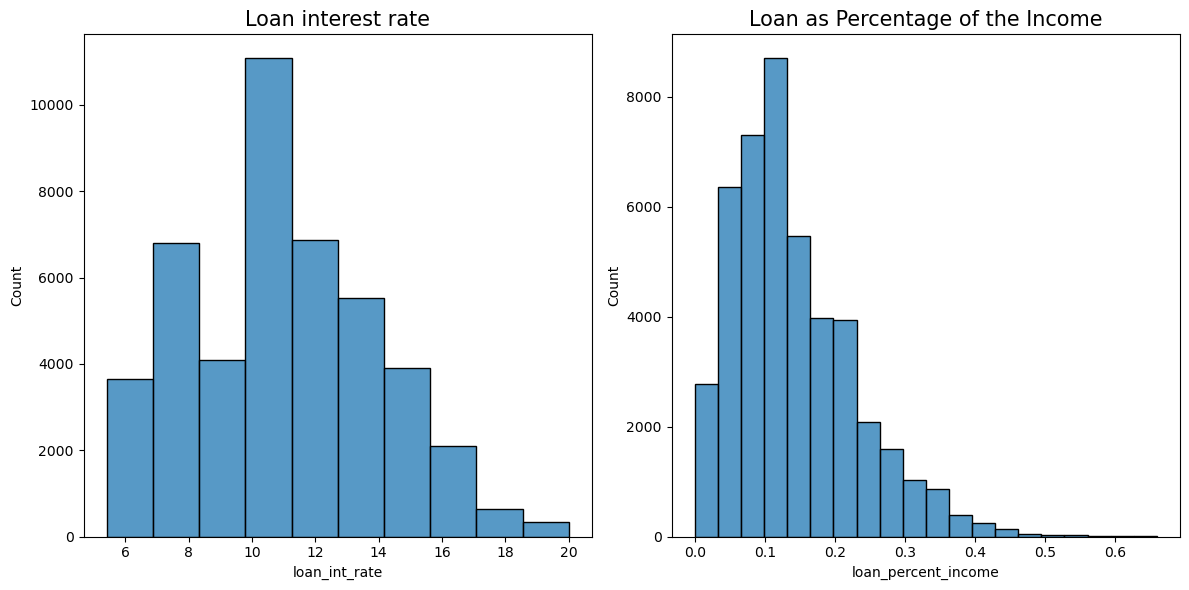

In [19]:
### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_amnt', bins=20, ax=ax1)
ax1.set_title('Loan Amount Distribution', size=15)

ax2 = sns.histplot(data=data, x='loan_intent', ax=ax2)
ax2.set_title('Purpose of the Loan', size=15)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, size=8)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_int_rate', bins=10, ax=ax1)
ax1.set_title('Loan interest rate', size=15)

ax2 = sns.histplot(data=data, x='loan_percent_income', bins=20, ax=ax2)
ax2.set_title('Loan as Percentage of the Income', size=15)

plt.tight_layout()

In [20]:
num_features_two = ['loan_amnt', 'loan_int_rate', 'loan_percent_income']

for col in num_features_two:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

Skewness of loan_amnt: 1.1796919608876142
Kurtosis of loan_amnt: 1.3509317700975298

Skewness of loan_int_rate: 0.2137769461856264
Kurtosis of loan_int_rate: -0.42042193612408285

Skewness of loan_percent_income: 1.0344776671250524
Kurtosis of loan_percent_income: 1.0821626461535354



<Figure size 1200x600 with 0 Axes>

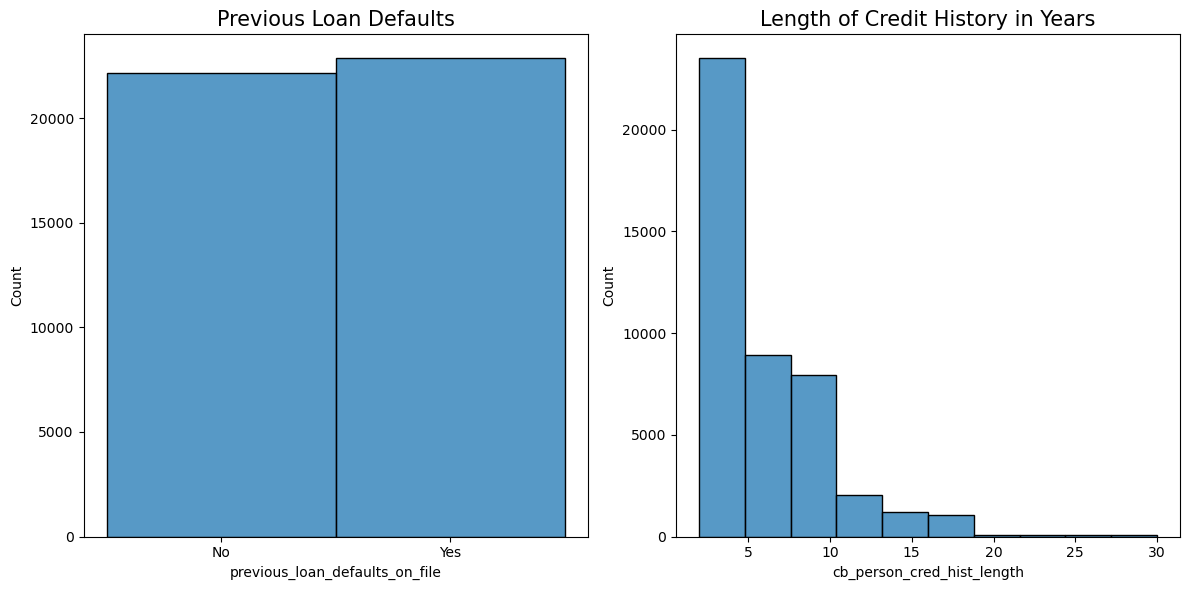

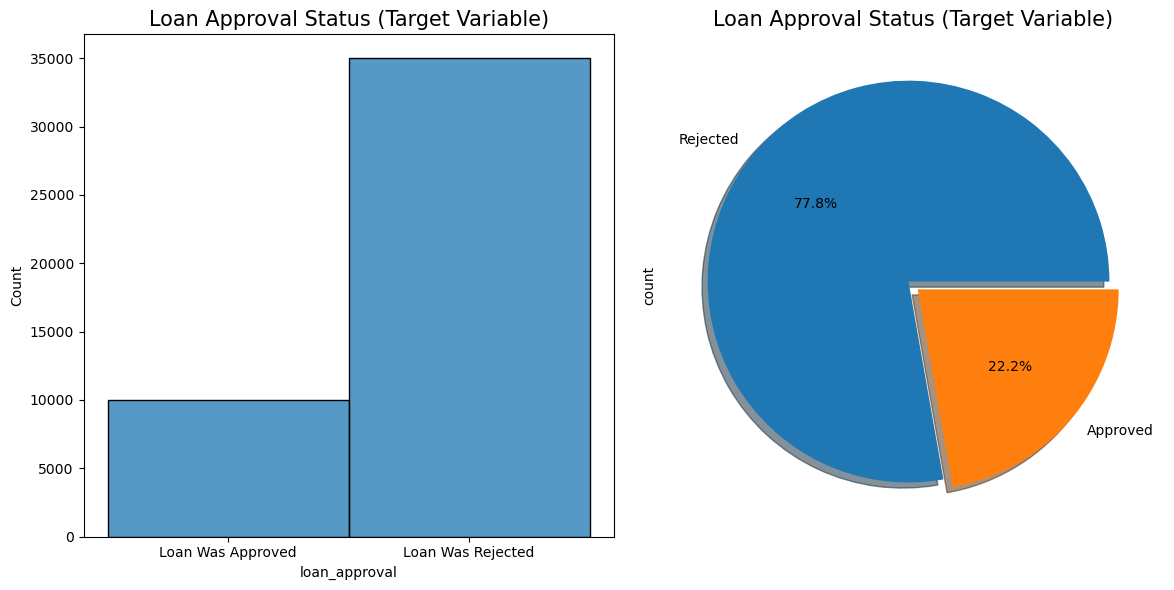

In [21]:
##########################
loan_approval = {0:'Loan Was Rejected', 1:'Loan Was Approved'}
data['loan_approval'] = data['loan_status'].map(loan_approval)

val = data['loan_approval'].value_counts()
##########################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='previous_loan_defaults_on_file', ax=ax1)
ax1.set_title('Previous Loan Defaults', size=15)

ax2 = sns.histplot(data=data, x='cb_person_cred_hist_length', bins=10, ax=ax2)
ax2.set_title('Length of Credit History in Years', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.histplot(data=data, x='loan_approval', ax=ax1)
ax1.set_title('Loan Approval Status (Target Variable)', size=15)

val.plot(kind='pie', labels=['Rejected','Approved'], autopct="%1.1f%%", shadow=True, explode=(0.03,0.03))
ax2.set_title('Loan Approval Status (Target Variable)', size=15)

plt.tight_layout()

In [22]:
data.drop('loan_approval', axis=1, inplace=True)

One can notice that:
* Around half of the clients that asked for a loan have a history of loan default.
* The majority of loan requests were rejected. It will be interesting to find what are the main reasons for the loan rejection.

## 2.2 Loan Interest Rate

I am curious to find what are the main factors that determine the large variability in the loan interest rate.

<Figure size 1200x600 with 0 Axes>

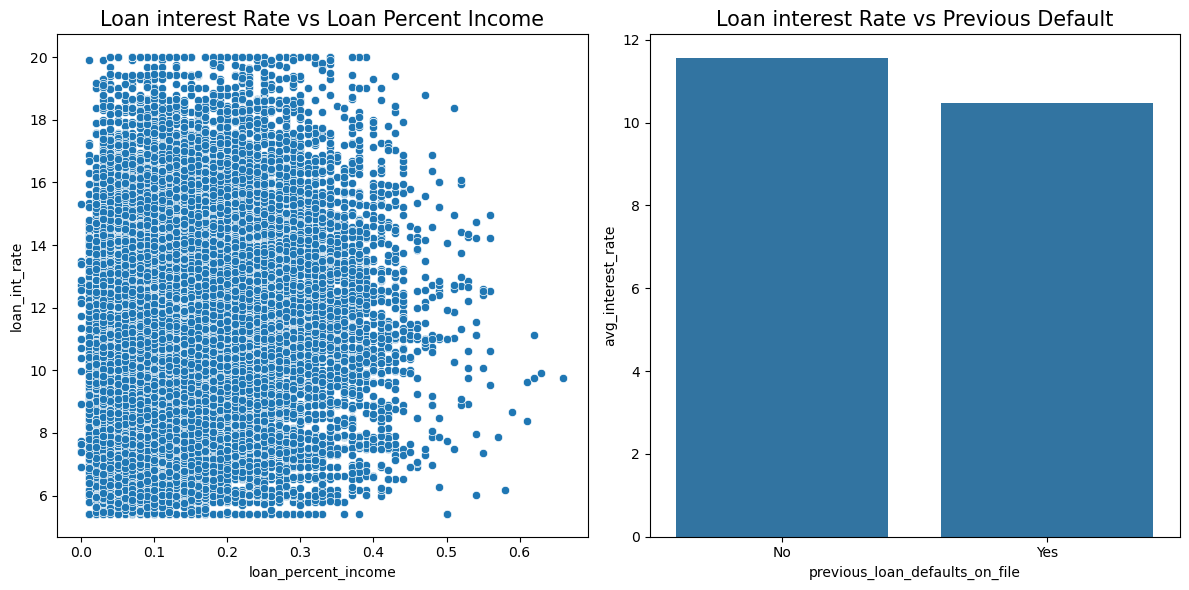

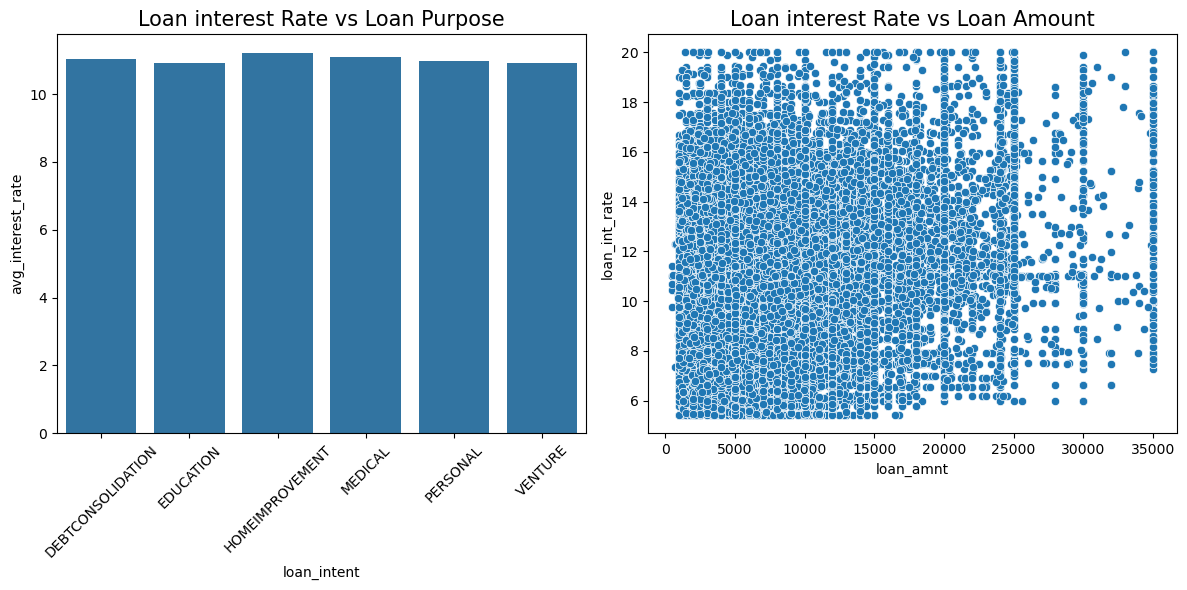

In [26]:
#######################################
int_rate_default = data.groupby('previous_loan_defaults_on_file')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')

int_rate_purpose = data.groupby('loan_intent')['loan_int_rate'].mean().reset_index(name='avg_interest_rate')
#######################################

### Figures ###
bigfig = plt.figure(figsize=(12,6))

(top, bottom) = bigfig.subfigures(2,1)

### Top figure ###
top.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.scatterplot(data=data, x='loan_percent_income', y='loan_int_rate', ax=ax1)
ax1.set_title('Loan interest Rate vs Loan Percent Income', size=15)

ax2 = sns.barplot(data=int_rate_default, x='previous_loan_defaults_on_file', y='avg_interest_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Previous Default', size=15)

plt.tight_layout()

### Bottom figure ###
bottom.subplots_adjust(left=.1, right=.9, wspace=.4, hspace=.4)

fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax1 = sns.barplot(data=int_rate_purpose, x='loan_intent', y='avg_interest_rate', ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Loan interest Rate vs Loan Purpose', size=15)

ax2 = sns.scatterplot(data=data, x='loan_amnt', y='loan_int_rate', ax=ax2)
ax2.set_title('Loan interest Rate vs Loan Amount', size=15)

plt.tight_layout()

Apparently, there is no relation between the interest rate and other variables, like the person income or the loan purpose.

Let's plot a correlation heatmap to further explore this issue.

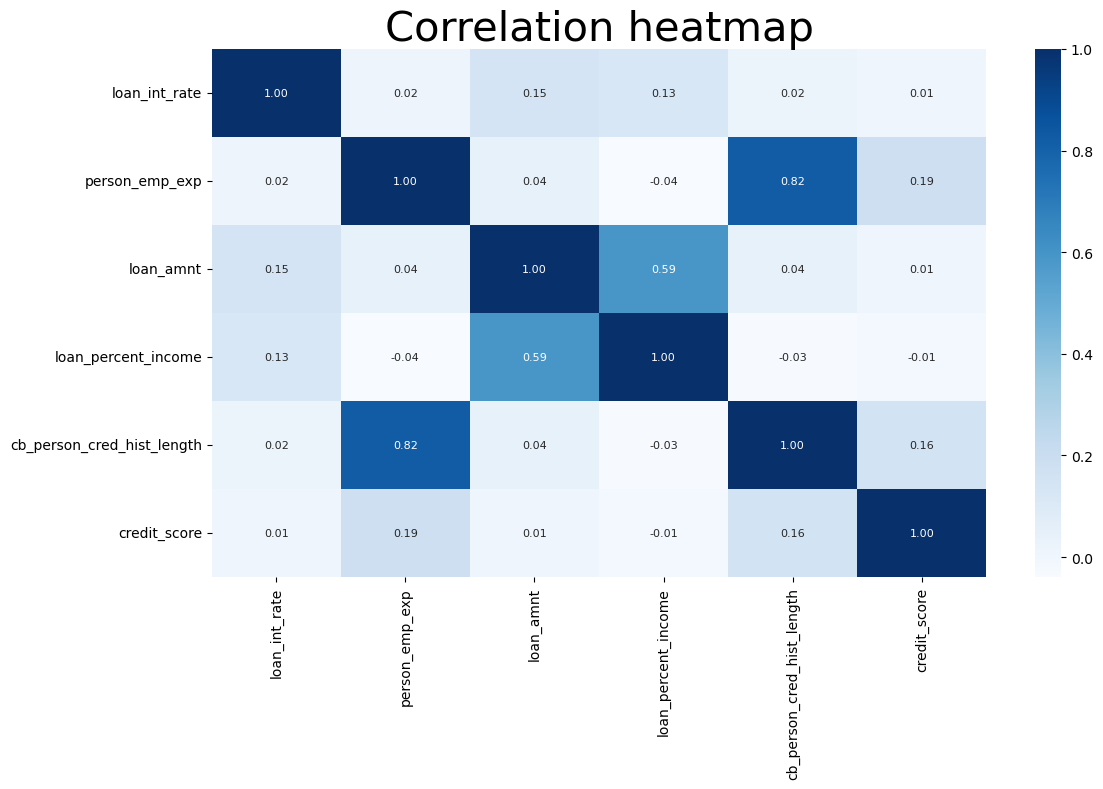

In [28]:
selected_features = ['loan_int_rate',
                     'person_emp_exp',
                     'loan_amnt',
                     'loan_percent_income',
                     'cb_person_cred_hist_length',
                     'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(data[selected_features].corr(method='pearson'),annot=True,fmt='.2f',annot_kws={"fontsize":8},cmap='Blues')
plt.title('Correlation heatmap',fontsize=30)

plt.tight_layout()
plt.show()

As shown by the heatmap, the loan interest rate has little or no correlation with the other variables. I wonder what are the factors that can make the rate either small or large.

## 2.3 Outliers

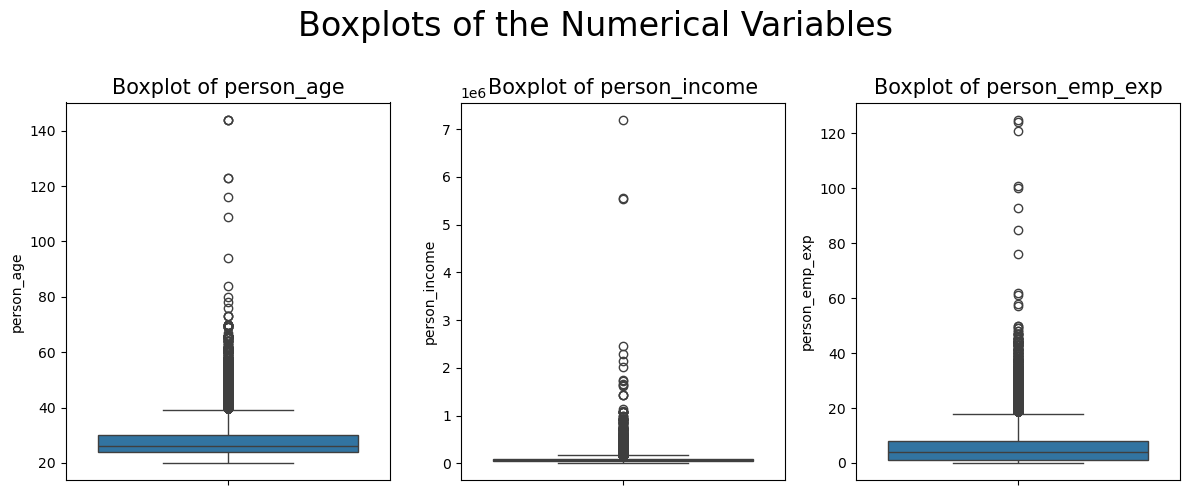

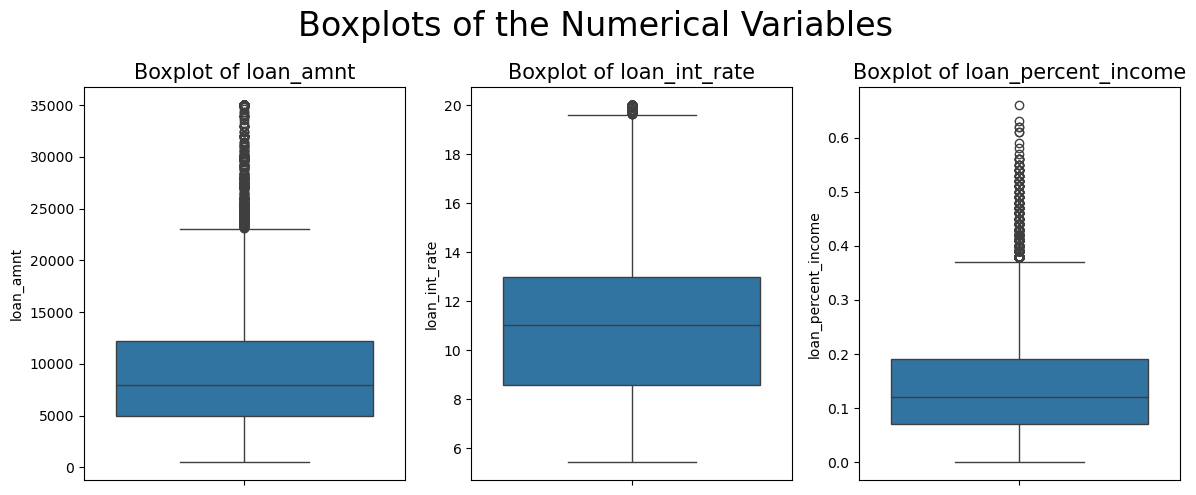

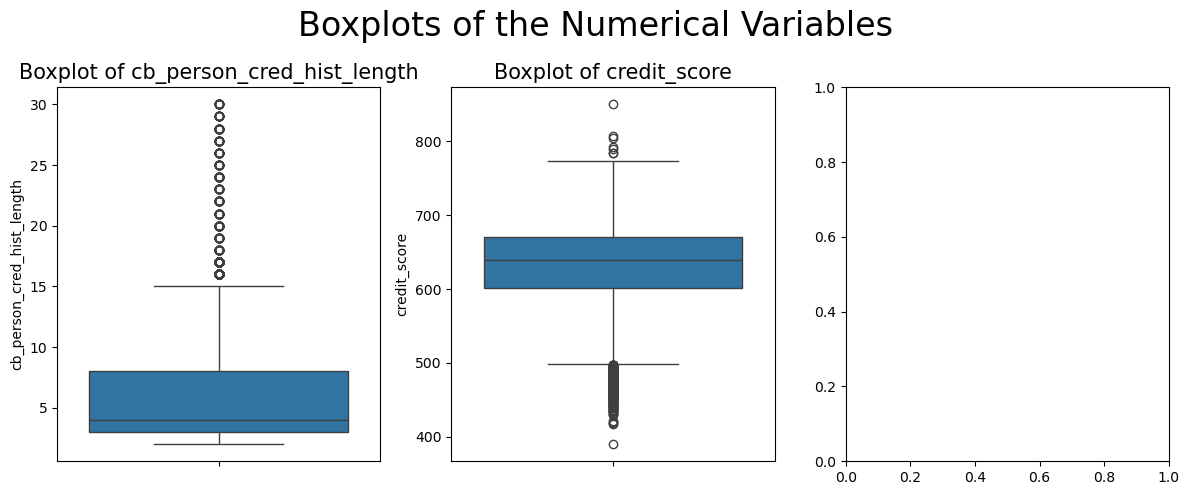

In [31]:
num_features = [col for col in data.columns if data[col].dtypes != 'O']

num_features.remove('loan_status')


def plot_boxplots(data):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))
        ax1 = sns.boxplot(data[num_features[i*3]], ax=ax1)
        ax1.set_title('Boxplot of '+str(num_features[i*3]), fontsize=15)
        ax2 = sns.boxplot(data[num_features[i*3+1]], ax=ax2)
        ax2.set_title('Boxplot of '+str(num_features[i*3+1]), fontsize=15)
        if i < 2:
            ax3 = sns.boxplot(data[num_features[i*3+2]], ax=ax3)
            ax3.set_title('Boxplot of '+str(num_features[i*3+2]), fontsize=15)

        fig.suptitle(f"Boxplots of the Numerical Variables", fontsize=24)

        plt.tight_layout()


plot_boxplots(data)

In [32]:
def outliers_percentage(data):

    outliers_perc = []

    for k,v in data.items():
        # Column must be of numeric type (not object)
        if data[k].dtype != 'O':
            q1 = v.quantile(0.25)
            q3 = v.quantile(0.75)
            irq = q3 - q1
            v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
            perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
            out_tuple = (k,int(perc))
            outliers_perc.append(out_tuple)
            print("Column %s outliers = %.2f%%" % (k,perc))

outliers_percentage(data[num_features])

Column person_age outliers = 5.73%
Column person_income outliers = 4.93%
Column person_emp_exp outliers = 3.83%
Column loan_amnt outliers = 5.22%
Column loan_int_rate outliers = 0.28%
Column loan_percent_income outliers = 2.00%
Column cb_person_cred_hist_length outliers = 3.04%
Column credit_score outliers = 1.04%


The fractions of outliers in the numerical columns are relatively small. The outliers are thus safe to remove.

# 3. Data Preprocessing
<a id="3"></a>

## 3.1 Outliers Capping

In [36]:
def remove_outliers_iqr(data, column):

    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data


capped_data = data.copy()

for col in num_features:

    capped_data = remove_outliers_iqr(capped_data, col)

Below, I am comparing the distributions of the control group variables before and after capping the outliers.

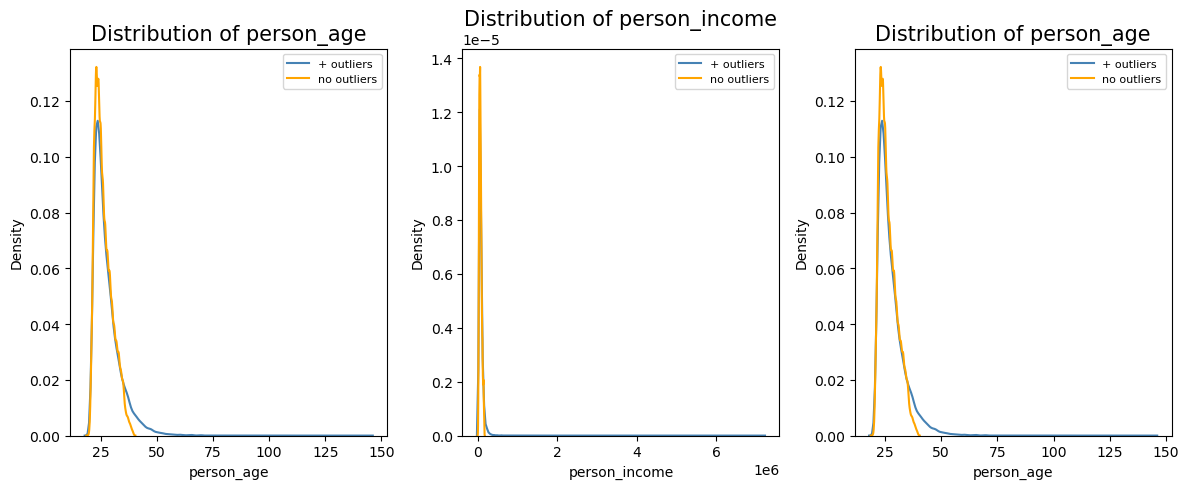

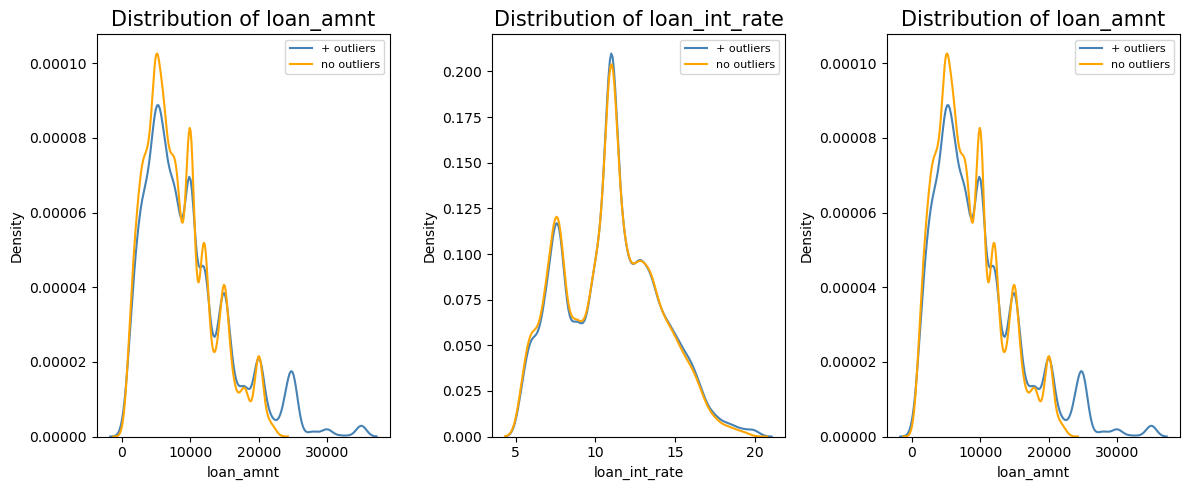

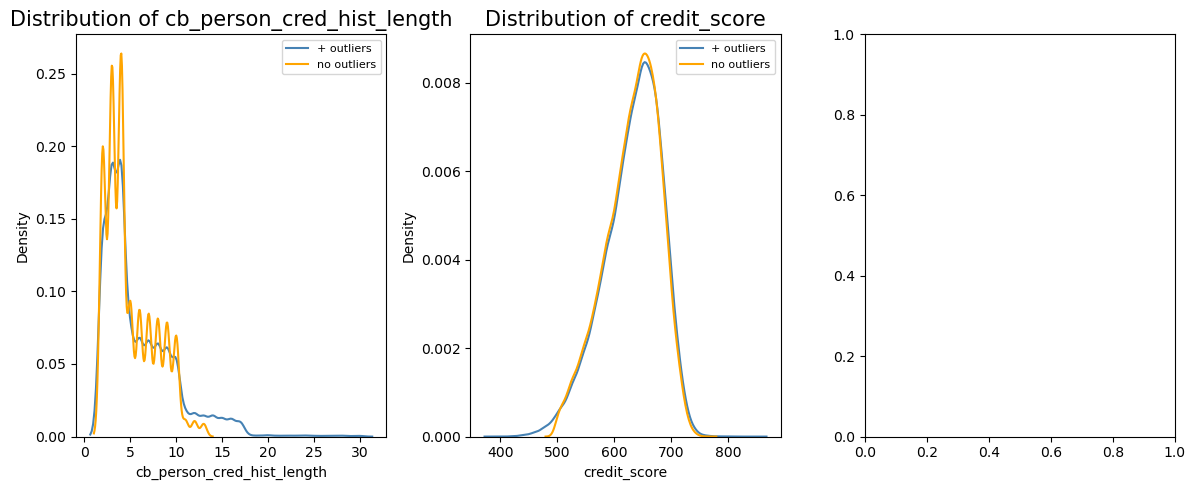

In [38]:
def plot_distributions(data, capped_data):

    for i in range(3):

        fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(12,5))

        ax1 = sns.kdeplot(data[num_features[i*3]], ax=ax1, color='steelblue', label='+ outliers')
        ax1 = sns.kdeplot(capped_data[num_features[i*3]], ax=ax1, color='orange', label='no outliers')
        ax1.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
        ax1.legend(fontsize=8, loc='upper right')

        ax2 = sns.kdeplot(data[num_features[i*3+1]], ax=ax2, color='steelblue', label='+ outliers')
        ax2 = sns.kdeplot(capped_data[num_features[i*3+1]], ax=ax2, color='orange', label='no outliers')
        ax2.set_title('Distribution of '+str(num_features[i*3+1]), fontsize=15)
        ax2.legend(fontsize=8, loc='upper right')

        if i < 2:
            ax3 = sns.kdeplot(data[num_features[i*3]], ax=ax3, color='steelblue', label='+ outliers')
            ax3 = sns.kdeplot(capped_data[num_features[i*3]], ax=ax3, color='orange', label='no outliers')
            ax3.set_title('Distribution of '+str(num_features[i*3]), fontsize=15)
            ax3.legend(fontsize=8, loc='upper right')

        plt.tight_layout()


plot_distributions(data, capped_data)

Then, I am having a look at the skewness and kurtosis of the variable distributions. I want to see if the variables are more 'bell-shaped' than before.

In [40]:
print('##### Skewness and kurtosis after outliers capping ##### \n')

for col in num_features:

    print(f"Skewness of {col}: {skew(capped_data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(capped_data[col])}")
    print()

##### Skewness and kurtosis after outliers capping ##### 

Skewness of person_age: 0.8332576383223101
Kurtosis of person_age: -0.00044276170210322263

Skewness of person_income: 0.7304305154472135
Kurtosis of person_income: 0.09207264087009515

Skewness of person_emp_exp: 0.8947171977883184
Kurtosis of person_emp_exp: 0.030591506491959297

Skewness of loan_amnt: 0.73910383306941
Kurtosis of loan_amnt: -0.08602595958290582

Skewness of loan_int_rate: 0.15695724993566545
Kurtosis of loan_int_rate: -0.5732647408021432

Skewness of loan_percent_income: 0.6080250250748
Kurtosis of loan_percent_income: -0.346650026917696

Skewness of cb_person_cred_hist_length: 0.8477000988338078
Kurtosis of cb_person_cred_hist_length: -0.2499588605626233

Skewness of credit_score: -0.4772494248773158
Kurtosis of credit_score: -0.28698076044001386



In [41]:
print('##### Skewness and kurtosis before outliers capping ##### \n')

for col in num_features_one:

    print(f"Skewness of {col}: {skew(data[col])}")
    print(f"Kurtosis of {col}: {kurtosis(data[col])}")
    print()

##### Skewness and kurtosis before outliers capping ##### 

Skewness of person_age: 2.5480690657849285
Kurtosis of person_age: 18.64724355494631

Skewness of person_income: 34.13644520299569
Kurtosis of person_income: 2398.418123917783

Skewness of person_emp_exp: 2.594830874585158
Kurtosis of person_emp_exp: 19.166060676086243



One can notice that the distributions are more 'bell-shaped' than before the outliers capping. The next step might be to apply a Log or Box-Cox transformation to further 'improve' the shape of the variables.

## 3.2 Label Encoding, Scaling and Train-Test Split

**Train-test split**

In [45]:
X = capped_data.drop('loan_status', axis=1)
y = capped_data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28852, 13), (7213, 13), (28852,), (7213,))

In [46]:
X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file
4371,22.0,male,Master,29754.0,0,RENT,4800.0,EDUCATION,7.49,0.16,2.0,598,No
36914,32.0,male,Associate,31810.0,9,RENT,3000.0,MEDICAL,9.70,0.09,9.0,599,Yes
23601,32.0,male,Associate,44939.0,7,RENT,9000.0,MEDICAL,6.92,0.20,8.0,670,No
9547,24.0,female,Bachelor,75777.0,0,MORTGAGE,9500.0,EDUCATION,6.54,0.13,2.0,670,No
43972,30.0,female,Associate,59500.0,9,RENT,10000.0,MEDICAL,15.45,0.17,8.0,610,No


Let's have a look at the cardinality of the categorical variables.

In [48]:
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

for col in cat_cols:
    print(f'feature: {col}; cardinality: {X_train[col].nunique()}')

feature: person_gender; cardinality: 2
feature: person_education; cardinality: 5
feature: person_home_ownership; cardinality: 4
feature: loan_intent; cardinality: 6
feature: previous_loan_defaults_on_file; cardinality: 2


Let's check if all the classes in the categorical variables with cardinality > 2 have frequency > 0.05.

In [50]:
for col in cat_cols:
    print()
    print(X_train[col].value_counts(normalize=True).reset_index())


  person_gender  proportion
0          male    0.547969
1        female    0.452031

  person_education  proportion
0         Bachelor    0.310273
1        Associate    0.259497
2      High School    0.258422
3           Master    0.161271
4        Doctorate    0.010537

  person_home_ownership  proportion
0                  RENT    0.542146
1              MORTGAGE    0.391030
2                   OWN    0.064259
3                 OTHER    0.002565

         loan_intent  proportion
0          EDUCATION    0.208963
1            MEDICAL    0.193955
2            VENTURE    0.171253
3           PERSONAL    0.166124
4  DEBTCONSOLIDATION    0.158429
5    HOMEIMPROVEMENT    0.101275

  previous_loan_defaults_on_file  proportion
0                            Yes    0.523638
1                             No    0.476362


I will group 'Doctorate' with 'Master' in 'person_education' because 'Doctorate' has frequency less than 0.05 and 'Master' is the most similar education category.

In [52]:
X_train.loc[X_train['person_education'].isin(['Doctorate', 'Master']), 'person_education'] = 'Master&Doctorate'
X_test.loc[X_test['person_education'].isin(['Doctorate', 'Master']), 'person_education'] = 'Master&Doctorate'

X_train['person_education'].value_counts(normalize=True).reset_index()

,person_education,proportion
0,Bachelor,0.310273
1,Associate,0.259497
2,High School,0.258422
3,Master&Doctorate,0.171808


The lines of code below are use to check whether there are labels in a variable that are only present in the test dataset. This would complicate the encoding procedure.

In [54]:
# Categorical columns in the training data
object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# Columns that can be safely ordinal encoded
good_label_cols = [col for col in object_cols if
                   set(X_test[col]).issubset(set(X_train[col]))]

# Problematic columns that will be dropped from the dataset
bad_label_cols = list(set(object_cols)-set(good_label_cols))

print('Categorical columns that will be encoded:', good_label_cols)
print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

Categorical columns that will be encoded: ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']

Categorical columns that will be dropped from the dataset: []


**Label encoding**

In [56]:
### Ordinal Encoding ###
edu_map = {'Associate':0, 'High School':1, 'Bachelor':2, 'Master&Doctorate':3}

X_train['person_education'] = X_train['person_education'].map(edu_map)
X_test['person_education'] = X_test['person_education'].map(edu_map)

In [57]:
### Label encoding ###
encoder = LabelEncoder()

for col in ['person_gender', 'previous_loan_defaults_on_file']:
    X_train[col] = encoder.fit_transform(X_train[col])
    X_test[col]  = encoder.transform(X_test[col])

In [58]:
cat_features_OH = ['person_home_ownership', 'loan_intent']

### One-hot encoding ###
oh_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').set_output(transform="pandas")

# Fit and transform the categorical columns
OHE_train = pd.DataFrame(oh_encoder.fit_transform(X_train[cat_features_OH]))
OHE_test  = pd.DataFrame(oh_encoder.transform(X_test[cat_features_OH]))

# One-hot encoding removed index; put it back
OHE_train.index = X_train.index
OHE_test.index  = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_train = X_train.drop(cat_features_OH,axis=1)
num_test  = X_test.drop(cat_features_OH,axis=1)

# Add one-hot encoded columns to numerical features
OHE_X_train = pd.concat([num_train,OHE_train],axis=1)
OHE_X_test  = pd.concat([num_test,OHE_test],axis=1)

**Scaling**

In [60]:
mm_scaler = MinMaxScaler()
std_scaler = StandardScaler()

STD_list = ['person_age',
            'person_income',
            'person_emp_exp',
            'loan_amnt',
            'loan_int_rate',
            'loan_percent_income',
            'cb_person_cred_hist_length',
            'credit_score']

OHE_X_train[STD_list] = std_scaler.fit_transform(OHE_X_train[STD_list])
OHE_X_test[STD_list]  = std_scaler.transform(OHE_X_test[STD_list])

OHE_X_train.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
4371,-1.143003,1,3,-1.278958,-1.052408,-0.728877,-1.158992,0.420116,-1.132819,-0.718494,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
36914,1.448053,1,0,-1.213620,1.268945,-1.106036,-0.403781,-0.556994,1.511434,-0.697499,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
23601,1.448053,1,0,-0.796391,0.753089,0.151161,-1.353775,0.978465,1.133683,0.793192,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
9547,-0.624792,0,2,0.183616,-1.052408,0.255927,-1.483630,0.001355,-1.132819,0.793192,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
43972,0.929842,0,0,-0.333654,1.268945,0.360694,1.561135,0.559703,1.133683,-0.466547,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


# 4. Model Selection
<a id="4"></a>

## 4.1 Feature Importance and Correlations

**Feature Importance**

I will look at the relative importance of the features by means of a random forest classifier.

In [65]:
# Random Forest Model
random_forest = RandomForestClassifier(random_state=1, max_depth=20)
random_forest.fit(OHE_X_train, y_train)

importances = pd.DataFrame({'feature':OHE_X_train.columns, 'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance', ascending=False)
importances.head(15)

,feature,importance
10,previous_loan_defaults_on_file,0.226
6,loan_int_rate,0.166
7,loan_percent_income,0.153
3,person_income,0.131
9,credit_score,0.055
5,loan_amnt,0.055
14,person_home_ownership_RENT,0.035
0,person_age,0.031
4,person_emp_exp,0.027
8,cb_person_cred_hist_length,0.024


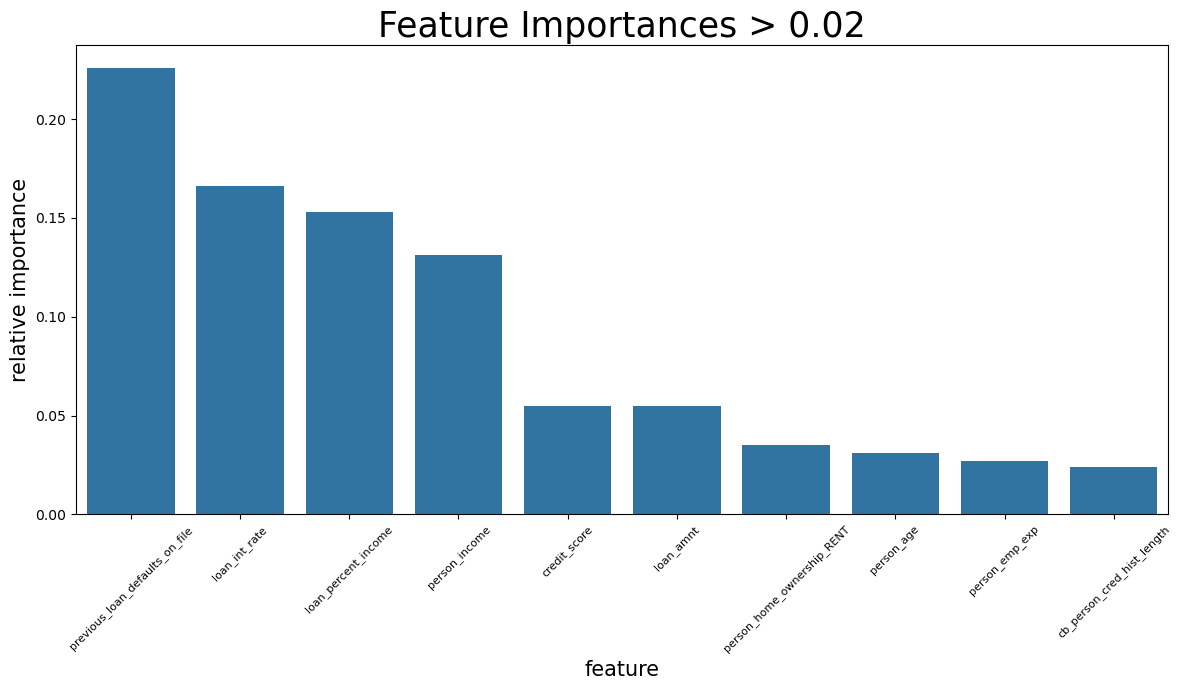

In [66]:
plt.figure(figsize=(12,7))

sns.barplot(importances[importances['importance'] > 0.02], x='feature', y='importance')

plt.title('Feature Importances > 0.02', fontsize=25)
plt.xlabel('feature', fontsize=15)
plt.xticks(fontsize=8, rotation=45)
plt.ylabel('relative importance', fontsize=15)

plt.tight_layout()
plt.show()

**Correlation heatmap**

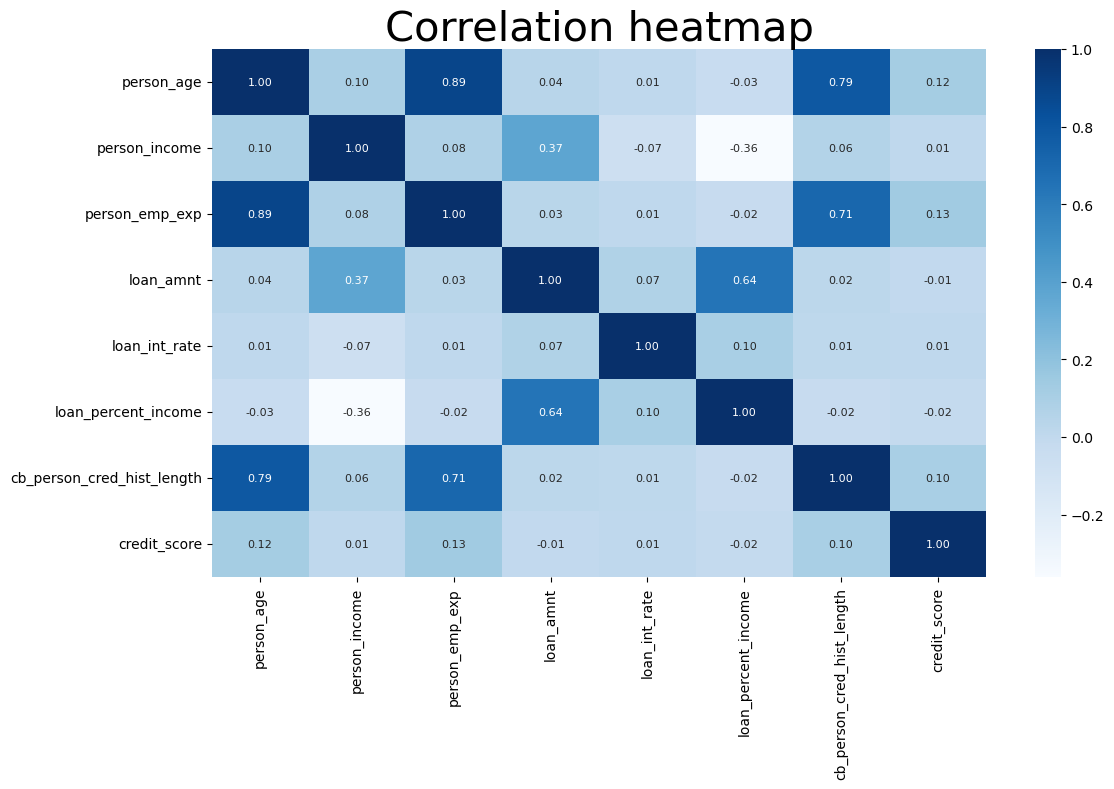

In [68]:
feat_list = ['person_age', 'person_income', 'person_emp_exp',
             'loan_amnt', 'loan_int_rate', 'loan_percent_income',
             'cb_person_cred_hist_length', 'credit_score']

plt.figure(figsize=(12,8))
sns.heatmap(OHE_X_train[feat_list].corr(method='pearson'), annot=True, fmt='.2f', annot_kws={"fontsize":8}, cmap='Blues')
plt.title('Correlation heatmap', fontsize=30)

plt.tight_layout()
plt.show()

There are some strong correlations between the variables, like that between age and work experience. None of them has a Pearson coefficient above 0.9, but I will have to monitor the situation in the modeling and fitting stage.

**Pairplot**

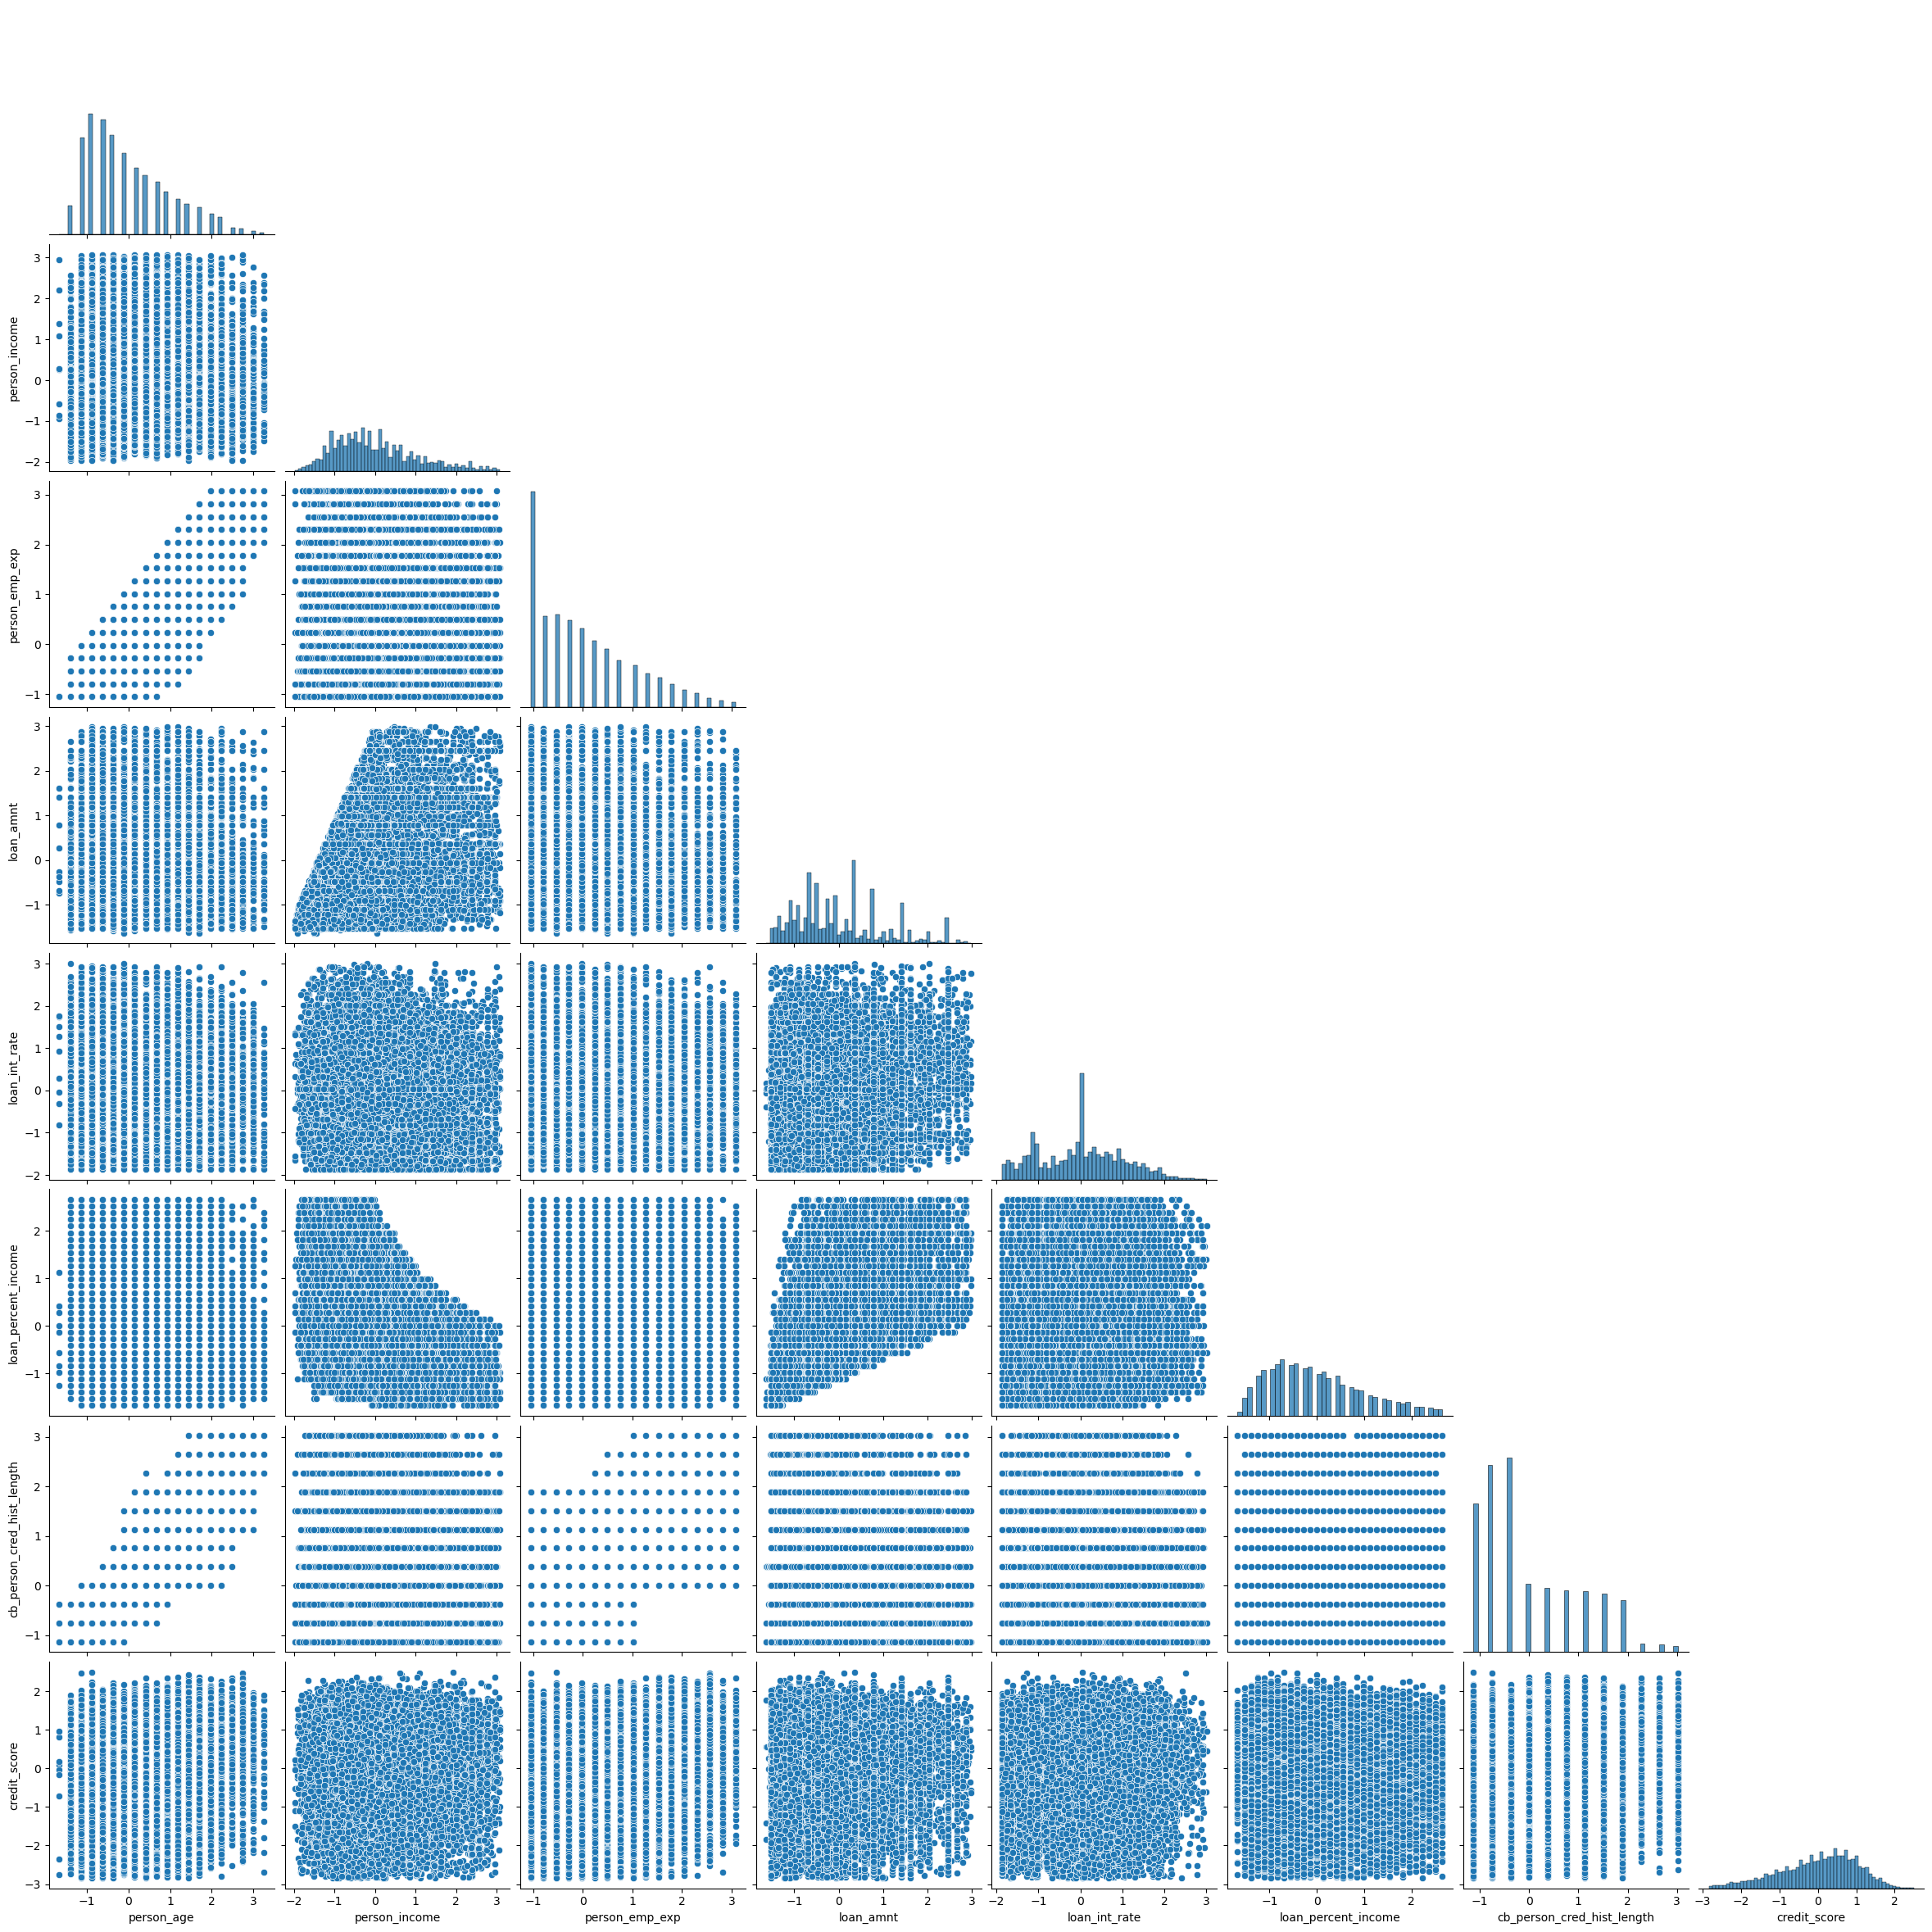

In [71]:
sns.pairplot(OHE_X_train[feat_list], size=3, corner=True)

There are variables that are linearly related, like 'person_age' and 'person_emp_exp'. Again, I will have to monitor this during the modeling and fitting stage. I might have to drop some of these variables from X.

## 4.2 ML Model Selection

I am comparing the performance of some ML models on the data. This is how I will pick two or three of them to fine tune their parameters.

In [75]:
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test):
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''

    results = {}

    # Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time

    # Calculate the training time
    results['train_time'] = end - start

    #  Get the predictions on the test set,
    #  then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time

    # Calculate the total prediction time
    results['pred_time'] = end - start

    # Compute accuracy score on the first 300 training samples
    results['accuracy_train'] = accuracy_score(y_train[:300],predictions_train)

    # Compute accuracy score on test set
    results['accuracy_test'] = accuracy_score(y_test,predictions_test)

    # Compute recall score on the first 300 training samples
    results['recall_train'] = recall_score(y_train[:300],predictions_train,average='macro')

    # Compute recall score on test set
    results['recall_test'] = recall_score(y_test,predictions_test,average='macro')

    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__,sample_size))

    # Return the results
    return results

In [76]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Initialize the models
clf_A = GradientBoostingClassifier(random_state=42)
clf_B = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(random_state=42),
    random_state=42
)
clf_C = RandomForestClassifier(random_state=42)
clf_D = XGBClassifier(random_state=42)
clf_E = SVC(random_state=42)

# Compute sample sizes
n = len(OHE_X_train)
samples = [
    int(round(n * 0.01)),
    int(round(n * 0.10)),
    int(round(n * 0.25)),
    int(round(n * 0.50)),
    int(round(n * 0.75)),
    n
]

# Collect results
results = {}
for clf in [clf_A, clf_B, clf_C, clf_D, clf_E]:
    name = clf.__class__.__name__
    results[name] = {}
    for i, s in enumerate(samples):
        results[name][i] = train_predict(
            clf, s,
            OHE_X_train, y_train,
            OHE_X_test, y_test
        )

GradientBoostingClassifier trained on 289 samples.
GradientBoostingClassifier trained on 2885 samples.
GradientBoostingClassifier trained on 7213 samples.
GradientBoostingClassifier trained on 14426 samples.
GradientBoostingClassifier trained on 21639 samples.
GradientBoostingClassifier trained on 28852 samples.
AdaBoostClassifier trained on 289 samples.
AdaBoostClassifier trained on 2885 samples.
AdaBoostClassifier trained on 7213 samples.
AdaBoostClassifier trained on 14426 samples.
AdaBoostClassifier trained on 21639 samples.
AdaBoostClassifier trained on 28852 samples.
RandomForestClassifier trained on 289 samples.
RandomForestClassifier trained on 2885 samples.
RandomForestClassifier trained on 7213 samples.
RandomForestClassifier trained on 14426 samples.
RandomForestClassifier trained on 21639 samples.
RandomForestClassifier trained on 28852 samples.
XGBClassifier trained on 289 samples.
XGBClassifier trained on 2885 samples.
XGBClassifier trained on 7213 samples.
XGBClassifier 

In [77]:
# Printing out the values
for i in results.items():
    print(i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'25%', 3:'50%', 4:'75%', 5:'100%'}))

GradientBoostingClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.299200,0.847701,1.749292,2.963187,4.427197,6.490232
pred_time,0.023935,0.016957,0.018981,0.017924,0.017922,0.024936
accuracy_train,0.990000,0.940000,0.920000,0.926667,0.913333,0.916667
accuracy_test,0.889228,0.920421,0.921808,0.920560,0.919590,0.921669
recall_train,0.989022,0.895871,0.861161,0.878400,0.860928,0.858919
recall_test,0.821436,0.850447,0.851827,0.849000,0.850692,0.849951


AdaBoostClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.007977,0.021944,0.047871,0.110703,0.167552,0.227393
pred_time,0.010972,0.007976,0.007979,0.008976,0.007978,0.004987
accuracy_train,0.993333,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_test,0.852350,0.880909,0.888396,0.890060,0.889089,0.893110
recall_train,0.991264,1.000000,1.000000,1.000000,1.000000,1.000000
recall_test,0.790396,0.830533,0.835226,0.828091,0.839749,0.834603


RandomForestClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.235373,0.467750,0.917552,1.849084,2.475384,3.100680
pred_time,0.077790,0.125663,0.102722,0.088763,0.106714,0.097770
accuracy_train,0.996667,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_test,0.892971,0.918619,0.923333,0.925551,0.922362,0.926383
recall_train,0.993506,1.000000,1.000000,1.000000,1.000000,1.000000
recall_test,0.798227,0.838072,0.847416,0.849318,0.843741,0.851373


XGBClassifier


,1%,10%,25%,50%,75%,100%
train_time,0.545104,0.149600,0.196475,0.250331,0.288230,0.338097
pred_time,0.016956,0.017952,0.018949,0.018950,0.017951,0.017952
accuracy_train,0.993333,1.000000,0.996667,0.983333,0.976667,0.973333
accuracy_test,0.890060,0.910439,0.926244,0.926106,0.929710,0.930126
recall_train,0.991264,1.000000,0.993506,0.967532,0.954545,0.956555
recall_test,0.831158,0.850067,0.870964,0.870621,0.873392,0.875186


SVC


,1%,10%,25%,50%,75%,100%
train_time,0.013963,0.182480,1.154883,3.636314,10.475000,17.184984
pred_time,0.183537,1.180841,2.708759,3.517594,4.820114,7.880047
accuracy_train,0.940000,0.916667,0.913333,0.910000,0.910000,0.906667
accuracy_test,0.880355,0.904755,0.907805,0.912935,0.912519,0.915292
recall_train,0.917128,0.871673,0.865180,0.862938,0.862938,0.856444
recall_test,0.783930,0.830148,0.834871,0.845242,0.841404,0.845187


The performance of the ML models on the test data are similar, but the Random Forest and AdaBoost classifiers overfit.

In [79]:
def get_test_scores(model_name:str,preds,y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy  = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds, average='macro')
    recall    = recall_score(y_test_data, preds, average='macro')
    f1        = f1_score(y_test_data, preds, average='macro')

    table = pd.DataFrame({'model': [model_name],'precision': [precision],'recall': [recall],
                          'F1': [f1],'accuracy': [accuracy]})

    return table

In [80]:
def plot_validation_curve(clf,X,y,CV,param_name,param_range,y_lim=[0.8, 0.95]):

    train_scores, test_scores = validation_curve(
                estimator = clf,
                X = X,
                y = y,
                param_name = param_name,
                param_range = param_range,
                cv = CV)

    train_mean = np.mean(train_scores,axis=1)
    train_std = np.std(train_scores,axis=1)
    test_mean = np.mean(test_scores,axis=1)
    test_std = np.std(test_scores,axis=1)

    plt.figure(figsize=(12,6))

    plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

    plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

    plt.fill_between(param_range,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

    plt.xlim([param_range[0], param_range[-1]])
    plt.ylim(y_lim)

    plt.grid()
    plt.legend(loc='lower right')
    plt.xlabel(f'{param_name}')
    plt.ylabel('Accuracy')
    plt.title(f"Validation Curve of '{param_name}'", size=25)

    plt.tight_layout()
    plt.show()

# 5. Ensemble Learning
<a id="5"></a>

## 5.1 Ensemble with a Voting Classifier

In [83]:
svc_model = SVC(random_state=42, probability=True)

svc_model.fit(OHE_X_train, y_train)

test_preds_svc = svc_model.predict(OHE_X_test)

svc_test_results = get_test_scores('SVC Classifier', test_preds_svc, y_test)

svc_test_results

,model,precision,recall,F1,accuracy
0,SVC Classifier,0.882958,0.845187,0.862169,0.915292


In [84]:
from sklearn.ensemble import VotingClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Create your voting ensemble with new instances:
voting_classifier = VotingClassifier(
    estimators=[
        ('XGB', XGBClassifier(random_state=42)),
        ('SVC', SVC(probability=True, random_state=42)),
        ('GradBoost', GradientBoostingClassifier(random_state=42)),
    ],
    voting='soft'
)

# Fit & evaluate
voting_classifier.fit(OHE_X_train, y_train)
test_preds_vote    = voting_classifier.predict(OHE_X_test)
vote_test_results = get_test_scores('Voting Classifier', test_preds_vote, y_test)


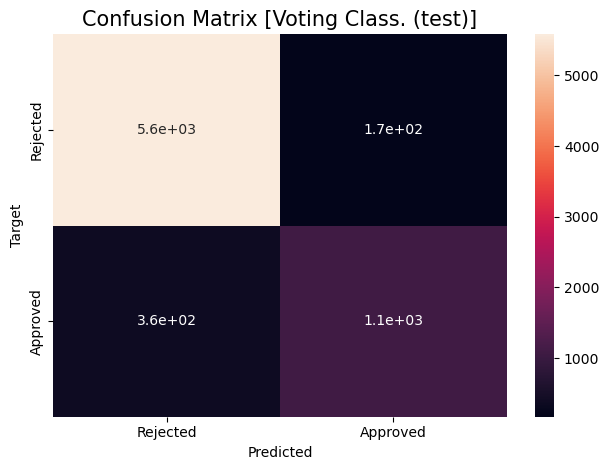

In [85]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_vote, labels=voting_classifier.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [Voting Class. (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved'])
ax.yaxis.set_ticklabels(['Rejected', 'Approved'])
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

## 5.2 Ensemble with a Stacking Classifier

In [87]:
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold

# 1) instantiate base models
xgb_model       = XGBClassifier(random_state=42)
svc_model       = SVC(probability=True, random_state=42)
gradboost_model = GradientBoostingClassifier(random_state=42)

# 2) instantiate meta-learner
rf_model = RandomForestClassifier(random_state=42)

# 3) define your CV splitter
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# 4) build the stack
stacking_clf = StackingClassifier(
    estimators=[
        ('XGB', xgb_model),
        ('SVC', svc_model),
        ('GradBoost', gradboost_model)
    ],
    final_estimator=rf_model,
    cv=kf
)

# 5) fit & evaluate
stacking_clf.fit(OHE_X_train, y_train)
test_preds_stack   = stacking_clf.predict(OHE_X_test)
stack_test_results = get_test_scores('Stacking Classifier', test_preds_stack, y_test)


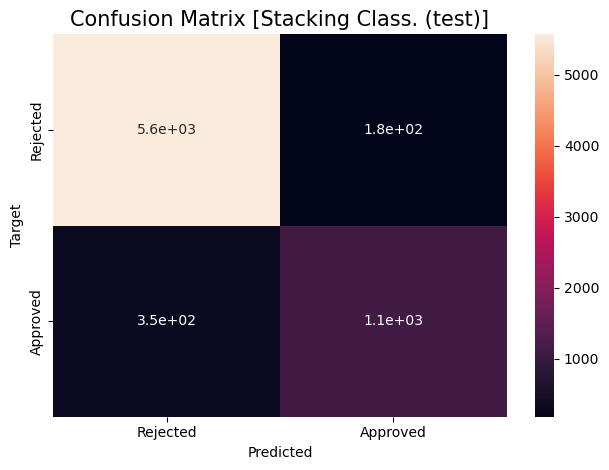

In [88]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, test_preds_stack, labels=stacking_clf.classes_)

ax = sns.heatmap(cm,annot=True)
ax.set_title('Confusion Matrix [Stacking Class. (test)]', fontsize=15)
ax.xaxis.set_ticklabels(['Rejected', 'Approved'])
ax.yaxis.set_ticklabels(['Rejected', 'Approved'])
ax.set_xlabel("Predicted")
ax.set_ylabel("Target")

plt.tight_layout()

The ensemble model accuracy might be improved by increasing the number of trials from 20 to 50 or 100.

In [90]:
svc_model.fit(OHE_X_train, y_train)


SVC(probability=True, random_state=42)

In [91]:
svc_preds = svc_model.predict(OHE_X_test)


In [92]:
# … after fitting the ensembles …

# Fit the standalone SVC
svc_model.fit(OHE_X_train, y_train)

# Generate all predictions
gradboost_preds = clf_A.predict(OHE_X_test)
rf_preds        = clf_C.predict(OHE_X_test)
xgb_preds       = clf_D.predict(OHE_X_test)
svc_preds       = svc_model.predict(OHE_X_test)
vote_preds      = voting_classifier.predict(OHE_X_test)
stack_preds     = stacking_clf.predict(OHE_X_test)

# Build each model’s result DataFrame
gradboost_test_results = get_test_scores('GradBoost',     gradboost_preds, y_test)
rf_test_results        = get_test_scores('RandomForest',  rf_preds,        y_test)
xgb_test_results       = get_test_scores('XGB',           xgb_preds,       y_test)
svc_test_results       = get_test_scores('SVC',           svc_preds,       y_test)
vote_test_results      = get_test_scores('Voting',        vote_preds,      y_test)
stack_test_results     = get_test_scores('Stacking',      stack_preds,     y_test)

# (Optional) votesoft_preds if you have that variant

# Concatenate and sort
import pandas as pd

final_test_results = pd.concat([
    gradboost_test_results,
    rf_test_results,
    xgb_test_results,
    svc_test_results,
    vote_test_results,
    stack_test_results,
    # votesoft_test_results
], axis=0) \
  .sort_values('accuracy', ascending=False) \
  .reset_index(drop=True)

print(final_test_results)


          model  precision    recall        F1  accuracy
0           XGB   0.902757  0.875186  0.888020  0.930126
1  RandomForest   0.912049  0.851373  0.877230  0.926383
2      Stacking   0.899404  0.865086  0.880756  0.926244
3        Voting   0.901430  0.860051  0.878589  0.925551
4     GradBoost   0.898136  0.849951  0.871095  0.921669
5           SVC   0.882958  0.845187  0.862169  0.915292
